## Review for Programming 3
1. Matrix operations
2. Dataframes
3. Plotting functions 

## Matrix operations

Defining a matrix:

In [1]:
matrix1 = [1 2; 3 4]
matrix2 = [2 0; 0 2]

println(matrix1)
println(matrix2)

[1 2; 3 4]
[2 0; 0 2]


Multiplying matrices:

In [12]:
result = matrix1 * matrix2

2×2 Matrix{Int64}:
 2  4
 6  8

Item-wise mutliplication of matrices:

In [13]:
result = matrix1 .* matrix2

2×2 Matrix{Int64}:
 2  0
 0  8

Transpose of a matrix:

In [48]:
matrix1'

2×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  3
 2  4

Inverse of a matrix:

In [15]:
inverse = inv(matrix1)

# multiply to check
matrix1 * inverse

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

Make an identity matrix of size 2, for instance. "I" is something we can use if we import the LinearAlgebra package

In [49]:
using LinearAlgebra
identity2 = Matrix(I, 2, 2)


2×2 Matrix{Bool}:
 1  0
 0  1

# Dataframes


In [50]:
using DataFrames
using Random
using CSV


Loading in a dataframe:

In [51]:
# change path to where the CSV file is on your machine
path = "C:\\Users\\Cam\\Desktop\\julia_demos\\iris.csv"
df = CSV.read(path, DataFrame)

Row,sepal.length,sepal.width,petal.length,petal.width,variety
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa
6,5.4,3.9,1.7,0.4,Setosa
7,4.6,3.4,1.4,0.3,Setosa
8,5.0,3.4,1.5,0.2,Setosa
9,4.4,2.9,1.4,0.2,Setosa


Grab a column vector from the dataframe:

In [19]:
df[:, "sepal.length"]

150-element Vector{Float64}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

Grab rows 2-5 from the dataframe as a new dataframe, and columns 1, 3, and 4:

In [20]:
small_frame = df[2:5, [1, 3, 4]]

Row,sepal.length,petal.length,petal.width
,Float64,Float64,Float64
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


We can use the filter function to partition our dataframe

In [21]:
filter(row -> row["sepal.length"] > 4.8, small_frame)

Row,sepal.length,petal.length,petal.width
,Float64,Float64,Float64
1,4.9,1.4,0.2
2,5.0,1.4,0.2


We can convert the dataframe to a matrix with a simple cast

In [22]:
small_matrix = Matrix(small_frame)

# stopped here 4/6

4×3 Matrix{Float64}:
 4.9  1.4  0.2
 4.7  1.3  0.2
 4.6  1.5  0.2
 5.0  1.4  0.2

We can add columns/rows via horizontal and vertical concatenation of matrices

In [23]:
new_column = zeros(4, 1)

4×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0

In [24]:
hcat(small_matrix, new_column)
# vcat function exists for vertical concatenation!


4×4 Matrix{Float64}:
 4.9  1.4  0.2  0.0
 4.7  1.3  0.2  0.0
 4.6  1.5  0.2  0.0
 5.0  1.4  0.2  0.0

## Graphing
I'll show an example of graphing a cool function with another function on top of it

In [25]:
# Here's the cool function:
function cool_function(t)
   return cos(t) * floor(4*sin(10t))/4
end

# Here's another function
function another_function(t)
    return -cos(t)
end


another_function (generic function with 1 method)

Now to make a graph over time, we need to have a bunch of time points as well as what the value of the function is at those times 

In [26]:
# 'range' defines an iterator, and we can turn that into a vector by using collect() on it
range_iterator = range(start=0, step=.01, stop=10)
time_vector = collect(range_iterator)

1001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
  9.89
  9.9
  9.91
  9.92
  9.93
  9.94
  9.95
  9.96
  9.97
  9.98
  9.99
 10.0

In [27]:
# Now, lets get the value of the function at all of those points:
output_vector1 = zeros(length(time_vector))
output_vector2 = zeros(length(time_vector))

# enumerate is a cool function we can use to get the index and the value at a certain point in the vector at the same time
for (index, time) in enumerate(time_vector)
    
    # assign function values to each index
    output_vector1[index] = cool_function(time)
    output_vector2[index] = another_function(time)
    
end

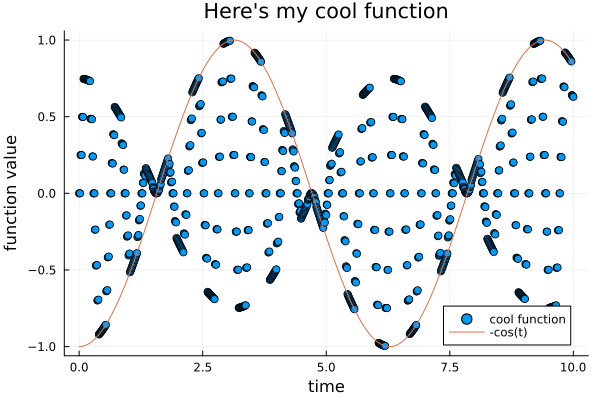

In [28]:
# Now lets import the graphing package and plot the guy. It's generally good practice to put all your
# imports at the top of a file, however.
using Plots

# My function is discontinuous, so I use a scatter plot to represent it. These are good for visualizing individual data points
plot(time_vector, output_vector1, seriestype=:scatter, label="cool function")
plot!(time_vector, output_vector2, label="-cos(t)")
xlabel!("time")
ylabel!("function value")
title!("Here's my cool function")

## Importing functions from outside code

Sometimes, we want to use code that comes from another Julia file in the same folder. To do this, we can say "include(file_name)" to allow us to use the functions that are in that code

In [29]:
include("some_code.jl")
add_two_numbers(1, 1)

2

## Timing code in Julia

Sometimes, it's useful to know how long code takes to run. I'll define some functions here and then time them 

In [30]:
function spin_wheels(t)
    total = 0
    for i = 1:t
        for j = 1:t
            for k = 1:t
                for r = 1:t
                    total *= pi
                end
            end
        end
    end
    return total
end

spin_wheels (generic function with 1 method)

In [31]:
# We can use the @time macro if we don't need to store the time taken
@time spin_wheels(200)

  2.314314 seconds


0.0

In [45]:
# Alternatively, we can use a BenchmarkTools Package to save the time taken

# import Pkg; Pkg.add("BenchmarkTools")

using BenchmarkTools

# Run the method 5 times and show some analysis
t = @benchmark spin_wheels(100) samples=5

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  147.310 ms … 149.087 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     147.899 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   148.203 ms ± 766.348 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █               █   █                                  █    █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁█ ▁
  147 ms           Histogram: frequency by time          149 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [43]:
# we can print the average time taken (default units are nanoseconds (10^-9 seconds))
average_time = sum(t.times) / length(t.times)   

1.4990942e8